<a href="https://colab.research.google.com/github/nikitabhardwaj/Stock_price_prediction/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Market Analysis
# Task 1 
We'll be adressing following questions:

1. What is the distribution of each stock?
2. What is the distribution of each stock at every day of the week?(weekly moving average)
3. What is the distribution of each stock at every month of the year?(monthly moving average)
4. What is the correlation between each of these stock?
5. Trend?
6. Seasonality?
7. fourier transformation?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px



In [ ]:
stocks_df = pd.read_csv('/stock.csv')

In [ ]:
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stocks_df = stocks_df.sort_values(by = ['Date'])

In [ ]:
print('Number of stocks considered: {}'.format(len(stocks_df.columns[1:])))

Number of stocks considered: 9


In [ ]:
print('List of stocks considered::')
for i in stocks_df.columns[1:]:
  print(i)

List of stocks considered::
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [ ]:
for i in stocks_df.columns[1:]:
  print('Average return for stock {} is {}'.format(i,stocks_df[i].mean()))

Average return for stock AAPL is 140.81982259008825
Average return for stock BA is 189.9427002862435
Average return for stock T is 35.162899482630756
Average return for stock MGM is 23.105743391848073
Average return for stock AMZN is 915.6656649203334
Average return for stock IBM is 161.85300148587336
Average return for stock TSLA is 259.6008153186657
Average return for stock GOOG is 783.7125121449732
Average return for stock sp500 is 2218.7495540592877


In [ ]:
for i in stocks_df.columns[1:]:
  print('Minimum dispersion from the mean for stock {} is {}'.format(i,stocks_df[i].std()))

Minimum dispersion from the mean for stock AAPL is 70.82760132839698
Minimum dispersion from the mean for stock BA is 103.67858597481985
Minimum dispersion from the mean for stock T is 3.2074898522656103
Minimum dispersion from the mean for stock MGM is 6.963847046140433
Minimum dispersion from the mean for stock AMZN is 697.838904933664
Minimum dispersion from the mean for stock IBM is 25.561937789518435
Minimum dispersion from the mean for stock TSLA is 210.98800293601454
Minimum dispersion from the mean for stock GOOG is 334.4480569440201
Minimum dispersion from the mean for stock sp500 is 537.3217268874765


In [ ]:
for i in stocks_df.columns[1:]:
  print('Minimum price for stock {} is {}'.format(i,stocks_df[i].min()))

Minimum price for stock AAPL is 55.790001
Minimum price for stock BA is 67.239998
Minimum price for stock T is 26.77
Minimum price for stock MGM is 7.14
Minimum price for stock AMZN is 175.929993
Minimum price for stock IBM is 94.769997
Minimum price for stock TSLA is 22.790001
Minimum price for stock GOOG is 278.481171
Minimum price for stock sp500 is 1278.040039


In [ ]:
for i in stocks_df.columns[1:]:
  print('Maximum price for stock {} is {}'.format(i,stocks_df[i].max()))

Maximum price for stock AAPL is 455.609985
Maximum price for stock BA is 440.619995
Maximum price for stock T is 43.470001
Maximum price for stock MGM is 38.029999
Maximum price for stock AMZN is 3225.0
Maximum price for stock IBM is 215.800003
Maximum price for stock TSLA is 1643.0
Maximum price for stock GOOG is 1568.48999
Maximum price for stock sp500 is 3386.149902


In [ ]:
stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
def show_plot(df, fig_title):
  df.plot(x='Date' , figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

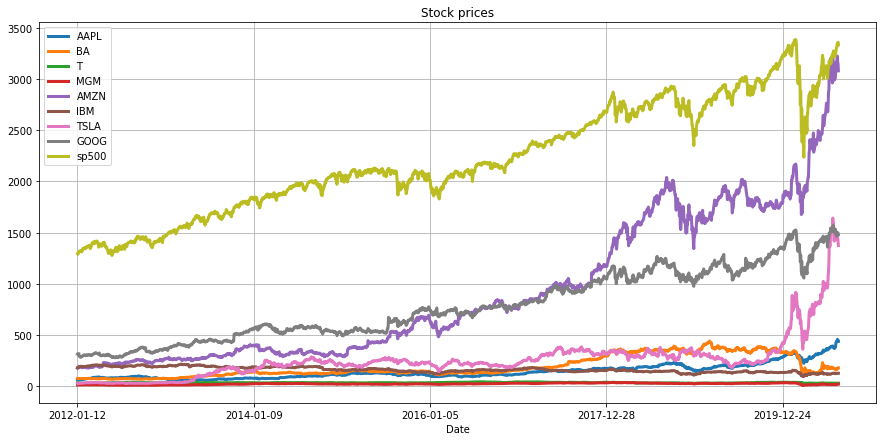

In [ ]:
show_plot(stocks_df, 'Stock prices')

In [ ]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
normalize(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


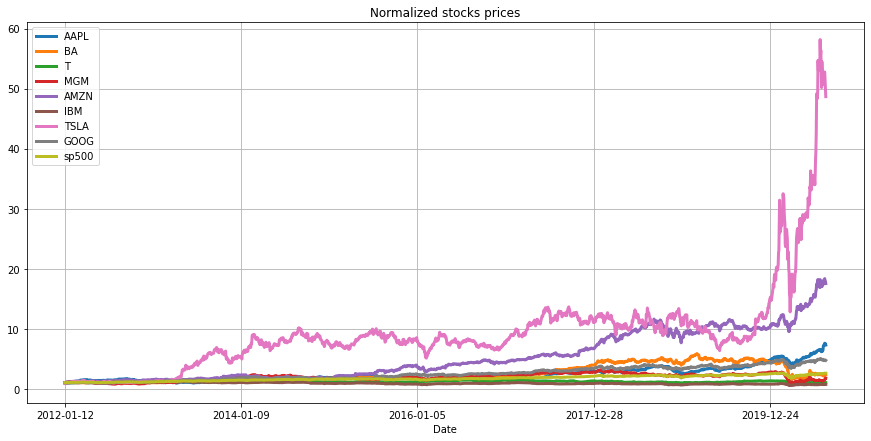

In [ ]:
show_plot(normalize(stocks_df), 'Normalized stocks prices')

In [ ]:
def interactive_plot(df,fig_title):
  fig = px.line(title = fig_title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name=i)
  fig.show()


In [ ]:
interactive_plot(stocks_df, 'Prices')

In [ ]:
interactive_plot(normalize(stocks_df), 'Normalized Price')

In [ ]:
def daily_return(df):
  df_daily_return = pd.DataFrame(df['Date'].copy())
  #df_daily_return = pd.DataFrame()
  for i in df.columns[1:]:
    df_daily_return['Daily Return for {}'.format(i)] = df[i].pct_change() * 100
    df_daily_return['Daily Return for {}'.format(i)][0] = 0
  return df_daily_return

In [ ]:
df_daily_return = daily_return(stocks_df)

In [ ]:
df_daily_return

,Date,Daily Return for AAPL,Daily Return for BA,Daily Return for T,Daily Return for MGM,Daily Return for AMZN,Daily Return for IBM,Daily Return for TSLA,Daily Return for GOOG,Daily Return for sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


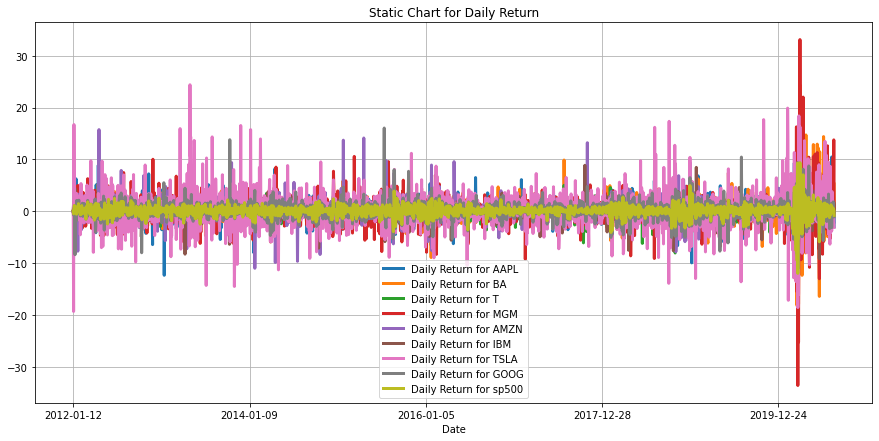

In [ ]:
show_plot(df_daily_return, 'Static Chart for Daily Return')

In [ ]:
interactive_plot(df_daily_return, 'Interactive Chart for Daily Return')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



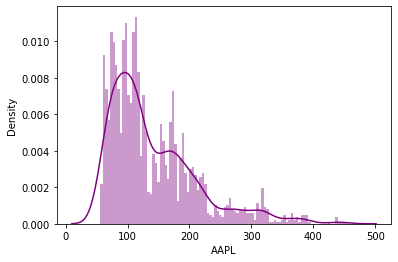

In [ ]:
#for i in stocks_df.columns[1:]:
sns.distplot(stocks_df['AAPL'],bins=100,color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2d1f368d0>,
      dtype=object)

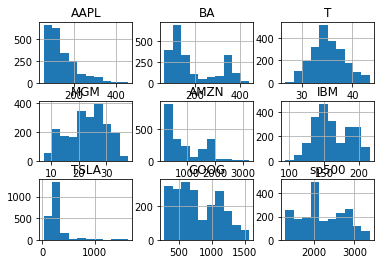

In [ ]:
stocks_df.hist()

In [ ]:
ma_day = [5,30]
for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  df_ma = pd.DataFrame(stocks_df['Date'].copy())
  for j in stocks_df.columns[1:]:
    df_ma['{} day MA for {}'.format(ma,j)] = stocks_df.loc[:,j].rolling(window=ma).mean()

In [ ]:
df_ma

,Date,30 day MA for AAPL,30 day MA for BA,30 day MA for T,30 day MA for MGM,30 day MA for AMZN,30 day MA for IBM,30 day MA for TSLA,30 day MA for GOOG,30 day MA for sp500
0,2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,384.319999,175.622667,29.885000,16.441333,3008.719002,122.150666,1385.861666,1491.780656,3193.106014
2155,2020-08-06,387.504999,175.473001,29.899000,16.492333,3025.072339,122.474000,1403.485999,1494.051656,3203.067008
2156,2020-08-07,390.158666,175.311001,29.909000,16.570000,3038.835002,122.671666,1419.043665,1495.823657,3211.984342
2157,2020-08-10,393.401333,175.624334,29.946333,16.767667,3054.011328,123.002333,1434.337996,1500.363656,3223.698340
